In [1]:
!pip install pygwalker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.3/993.3 kB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 22.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 30.1 MB/s eta 0:00:00


In [2]:
pip install itables

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.6/215.6 kB 4.3 MB/s eta 0:00:00


In [3]:
import pandas as pd
import itables
import pygwalker as pyg
import warnings
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

itables.init_notebook_mode(all_interactive=True)
warnings.simplefilter('ignore')

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
# Load df, Colab version
df=pd.read_excel('/content/drive/MyDrive/Training/TCC Data Analytics/Projects/Project 4/project-four/resources/Section1All_xls.xlsx',sheet_name='T10505-Q',skiprows=7)
# Jupyter version
#df=pd.read_excel('../../resources/Section1All_xls.xlsx',sheet_name='T10505-Q',skiprows=7)

In [8]:
df

Line  \
0                                                   1   
1                                                   2   
2                                                   3   
3                                                   4   
4                                                   5   
..                                                ...   
63  1. Net expenses of NPISHs, defined as their gr...   
64  2. Gross output is net of unrelated sales, sec...   
65  3. Excludes unrelated sales, secondary sales, ...   
66  4. Excludes software embedded, or bundled, in ...   
67  5. Research and development investment exclude...   

                           Unnamed: 1 Unnamed: 2  1947Q1  1947Q2  1947Q3  \
0              Gross domestic product     A191RC  243164  245968  249585   
1   Personal consumption expenditures     DPCERC  156161  160031  163543   
2                               Goods     DGDSRC   95594   98248  100419   
3                       Durable goods     DDURRC   20722   21351   21770   
4            Motor vehicles and parts     DMOTRC    6319    6437    6181   
..                                ...        ...     ...     ...     ...   
63                                NaN        NaN     NaN     NaN     NaN   
64                                NaN        NaN     NaN     NaN     NaN   
65                                NaN        NaN     NaN     NaN     NaN   
66                                NaN        NaN     NaN     NaN     NaN   
67                                NaN        NaN     NaN     NaN     NaN   

    1947Q4  1948Q1  1948Q2  1948Q3  ...      2021Q3      2021Q4      2022Q1  \
0   259745  265742  272567  279196  ...  23828973.0  24654603.0  25029116.0   
1   167672  170372  174142  177072  ...  16285113.0  16718195.0  17030634.0   
2   103453  105093  107188  108741  ...   5515884.0   5732790.0   5879255.0   
3    23488   23547   24019   25277  ...   1972724.0   2070181.0   2120715.0   
4     7139    7694    7347    8146  ...    670962.0    715448.0    735274.0   
..     ...     ...     ...     ...  ...         ...         ...         ...   
63     NaN     NaN     NaN     NaN  ...         NaN         NaN         NaN   
64     NaN     NaN     NaN     NaN  ...         NaN         NaN         NaN   
65     NaN     NaN     NaN     NaN  ...         NaN         NaN         NaN   
66     NaN     NaN     NaN     NaN  ...         NaN         NaN         NaN   
67     NaN     NaN     NaN     NaN  ...         NaN         NaN         NaN   

        2022Q2      2022Q3      2022Q4      2023Q1      2023Q2      2023Q3  \
0   25544273.0  25994639.0  26408405.0  26813601.0  27063012.0  27610128.0   
1   17415115.0  17684189.0  17917039.0  18269569.0  18419007.0  18679496.0   
2    6014444.0   6046813.0   6047645.0   6133839.0   6144657.0   6231764.0   
3    2122910.0   2143128.0   2129012.0   2194859.0   2193586.0   2204485.0   
4     725941.0    728151.0    733853.0    776235.0    772653.0    764572.0   
..         ...         ...         ...         ...         ...         ...   
63         NaN         NaN         NaN         NaN         NaN         NaN   
64         NaN         NaN         NaN         NaN         NaN         NaN   
65         NaN         NaN         NaN         NaN         NaN         NaN   
66         NaN         NaN         NaN         NaN         NaN         NaN   
67         NaN         NaN         NaN         NaN         NaN         NaN   

        2023Q4  
0   27956998.0  
1   18914478.0  
2    6255650.0  
3    2202169.0  
4     758436.0  
..         ...  
63         NaN  
64         NaN  
65         NaN  
66         NaN  
67         NaN  

[68 rows x 311 columns]

In [9]:
# drop data code column C
df=df.drop(labels=['Line','Unnamed: 2'],axis=1)

In [10]:
df

Unnamed: 1  1947Q1  1947Q2  1947Q3  1947Q4  1948Q1  \
0              Gross domestic product  243164  245968  249585  259745  265742   
1   Personal consumption expenditures  156161  160031  163543  167672  170372   
2                               Goods   95594   98248  100419  103453  105093   
3                       Durable goods   20722   21351   21770   23488   23547   
4            Motor vehicles and parts    6319    6437    6181    7139    7694   
..                                ...     ...     ...     ...     ...     ...   
63                                NaN     NaN     NaN     NaN     NaN     NaN   
64                                NaN     NaN     NaN     NaN     NaN     NaN   
65                                NaN     NaN     NaN     NaN     NaN     NaN   
66                                NaN     NaN     NaN     NaN     NaN     NaN   
67                                NaN     NaN     NaN     NaN     NaN     NaN   

    1948Q2  1948Q3  1948Q4  1949Q1  ...      2021Q3      2021Q4      2022Q1  \
0   272567  279196  280366  275034  ...  23828973.0  24654603.0  25029116.0   
1   174142  177072  177928  176831  ...  16285113.0  16718195.0  17030634.0   
2   107188  108741  108657  107167  ...   5515884.0   5732790.0   5879255.0   
3    24019   25277   24971   24436  ...   1972724.0   2070181.0   2120715.0   
4     7347    8146    8554    8935  ...    670962.0    715448.0    735274.0   
..     ...     ...     ...     ...  ...         ...         ...         ...   
63     NaN     NaN     NaN     NaN  ...         NaN         NaN         NaN   
64     NaN     NaN     NaN     NaN  ...         NaN         NaN         NaN   
65     NaN     NaN     NaN     NaN  ...         NaN         NaN         NaN   
66     NaN     NaN     NaN     NaN  ...         NaN         NaN         NaN   
67     NaN     NaN     NaN     NaN  ...         NaN         NaN         NaN   

        2022Q2      2022Q3      2022Q4      2023Q1      2023Q2      2023Q3  \
0   25544273.0  25994639.0  26408405.0  26813601.0  27063012.0  27610128.0   
1   17415115.0  17684189.0  17917039.0  18269569.0  18419007.0  18679496.0   
2    6014444.0   6046813.0   6047645.0   6133839.0   6144657.0   6231764.0   
3    2122910.0   2143128.0   2129012.0   2194859.0   2193586.0   2204485.0   
4     725941.0    728151.0    733853.0    776235.0    772653.0    764572.0   
..         ...         ...         ...         ...         ...         ...   
63         NaN         NaN         NaN         NaN         NaN         NaN   
64         NaN         NaN         NaN         NaN         NaN         NaN   
65         NaN         NaN         NaN         NaN         NaN         NaN   
66         NaN         NaN         NaN         NaN         NaN         NaN   
67         NaN         NaN         NaN         NaN         NaN         NaN   

        2023Q4  
0   27956998.0  
1   18914478.0  
2    6255650.0  
3    2202169.0  
4     758436.0  
..         ...  
63         NaN  
64         NaN  
65         NaN  
66         NaN  
67         NaN  

[68 rows x 309 columns]

In [11]:
# save just the GDP row to a new df
gdp_row=df.iloc[0]
gdp=pd.DataFrame(gdp_row).T
#gdp.columns=['Qtr','GDP']
#gdp=gdp.set_index('')
gdp

Unnamed: 1  1947Q1  1947Q2  1947Q3  1947Q4  1948Q1  1948Q2  \
0      Gross domestic product  243164  245968  249585  259745  265742  272567   

   1948Q3  1948Q4  1949Q1  ...      2021Q3      2021Q4      2022Q1  \
0  279196  280366  275034  ...  23828973.0  24654603.0  25029116.0   

       2022Q2      2022Q3      2022Q4      2023Q1      2023Q2      2023Q3  \
0  25544273.0  25994639.0  26408405.0  26813601.0  27063012.0  27610128.0   

       2023Q4  
0  27956998.0  

[1 rows x 309 columns]

In [12]:
gdp=gdp.drop(labels=['Unnamed: 1'],axis=1)

In [13]:
is_dataframe=isinstance(gdp,pd.DataFrame)
print(is_dataframe)
print(gdp.info())
print(gdp.shape)

True
<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Columns: 308 entries, 1947Q1 to 2023Q4
dtypes: object(308)
memory usage: 2.4+ KB
None
(1, 308)


In [14]:
gdp

1947Q1  1947Q2  1947Q3  1947Q4  1948Q1  1948Q2  1948Q3  1948Q4  1949Q1  \
0  243164  245968  249585  259745  265742  272567  279196  280366  275034   

   1949Q2  ...      2021Q3      2021Q4      2022Q1      2022Q2      2022Q3  \
0  271351  ...  23828973.0  24654603.0  25029116.0  25544273.0  25994639.0   

       2022Q4      2023Q1      2023Q2      2023Q3      2023Q4  
0  26408405.0  26813601.0  27063012.0  27610128.0  27956998.0  

[1 rows x 308 columns]

In [15]:
gdp=gdp.convert_dtypes()
gdp.info()
gdp=gdp.T

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 0 to 0
Columns: 308 entries, 1947Q1 to 2023Q4
dtypes: Int64(308)
memory usage: 2.7 KB


In [16]:
#gdp.rename(columns={'0':'GDP'},inplace=True)
gdp['growth'] = gdp[0].pct_change()
gdp

0    growth
1947Q1    243164      <NA>
1947Q2    245968  0.011531
1947Q3    249585  0.014705
1947Q4    259745  0.040708
1948Q1    265742  0.023088
...          ...       ...
2022Q4  26408405  0.015917
2023Q1  26813601  0.015343
2023Q2  27063012  0.009302
2023Q3  27610128  0.020216
2023Q4  27956998  0.012563

[308 rows x 2 columns]

In [17]:
gdp

0    growth
1947Q1    243164      <NA>
1947Q2    245968  0.011531
1947Q3    249585  0.014705
1947Q4    259745  0.040708
1948Q1    265742  0.023088
...          ...       ...
2022Q4  26408405  0.015917
2023Q1  26813601  0.015343
2023Q2  27063012  0.009302
2023Q3  27610128  0.020216
2023Q4  27956998  0.012563

[308 rows x 2 columns]

In [18]:
#import hvplot.pandas
#gdpT.hvplot.line(x=0,y='growth',width=900,xticks=10)

In [19]:
#plot=gdpT.hvplot.line(x=0,y='growth')
#plot.opts(xrotation=90,width=900)


In [20]:
# transpose columns & rows, print result, and check for nulls
gdpT=gdp.T
print(gdpT)
gdpT=gdpT.fillna(0)
gdpNull=gdpT.isnull()
print(gdpNull)

        1947Q1    1947Q2    1947Q3    1947Q4    1948Q1    1948Q2    1948Q3  \
0       243164    245968    249585    259745    265742    272567    279196   
growth    <NA>  0.011531  0.014705  0.040708  0.023088  0.025683  0.024321   

          1948Q4    1949Q1    1949Q2  ...    2021Q3    2021Q4    2022Q1  \
0         280366    275034    271351  ...  23828973  24654603  25029116   
growth  0.004191 -0.019018 -0.013391  ...  0.023038  0.034648   0.01519   

          2022Q2    2022Q3    2022Q4    2023Q1    2023Q2    2023Q3    2023Q4  
0       25544273  25994639  26408405  26813601  27063012  27610128  27956998  
growth  0.020582  0.017631  0.015917  0.015343  0.009302  0.020216  0.012563  

[2 rows x 308 columns]
        1947Q1  1947Q2  1947Q3  1947Q4  1948Q1  1948Q2  1948Q3  1948Q4  \
0        False   False   False   False   False   False   False   False   
growth   False   False   False   False   False   False   False   False   

        1949Q1  1949Q2  ...  2021Q3  2021Q4  2022Q1  20

In [34]:
gdpT

1947Q1         1947Q2         1947Q3         1947Q4         1948Q1  \
0       243164  245968.000000  249585.000000  259745.000000  265742.000000   
growth       0       0.011531       0.014705       0.040708       0.023088   

               1948Q2         1948Q3         1948Q4         1949Q1  \
0       272567.000000  279196.000000  280366.000000  275034.000000   
growth       0.025683       0.024321       0.004191      -0.019018   

               1949Q2  ...        2021Q3        2021Q4        2022Q1  \
0       271351.000000  ...  2.382897e+07  2.465460e+07  2.502912e+07   
growth      -0.013391  ...  2.303807e-02  3.464816e-02  1.519039e-02   

              2022Q2        2022Q3        2022Q4        2023Q1        2023Q2  \
0       2.554427e+07  2.599464e+07  2.640840e+07  2.681360e+07  2.706301e+07   
growth  2.058231e-02  1.763080e-02  1.591736e-02  1.534345e-02  9.301660e-03   

              2023Q3        2023Q4  
0       2.761013e+07  2.795700e+07  
growth  2.021638e-02  1.256314e-02  

[2 rows x 308 columns]

In [29]:
gdp

0    growth
1947Q1    243164      <NA>
1947Q2    245968  0.011531
1947Q3    249585  0.014705
1947Q4    259745  0.040708
1948Q1    265742  0.023088
...          ...       ...
2022Q4  26408405  0.015917
2023Q1  26813601  0.015343
2023Q2  27063012  0.009302
2023Q3  27610128  0.020216
2023Q4  27956998  0.012563

[308 rows x 2 columns]

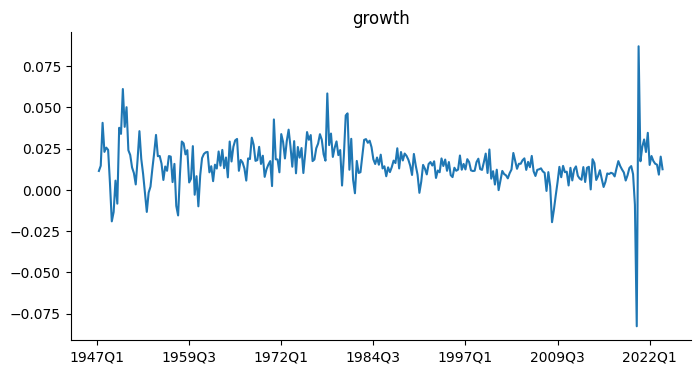

In [30]:
# @title growth
# colab suggested graph

from matplotlib import pyplot as plt
gdp['growth'].plot(kind='line', figsize=(8, 4), title='growth')
plt.gca().spines[['top', 'right']].set_visible(False)

In [28]:
#!pip install hvplot
import hvplot.pandas
gdp.hvplot.line(x=0,y='growth',width=900)

:Curve   [index]   (growth)

In [33]:
# old, OG test
#X=gdpT['0'].values.reshape(-1,1)
#y=gdpT['growth']

KeyError: '0'

In [ ]:
#var_train
#var_test

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [ ]:
# use KNN ... needs labels
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

In [ ]:
# use linear regression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print('Mean squared error:', mean_squared_error(y_test,y_pred))


In [ ]:
# regression suggestions:
# svr
# xg boost